# 1
A particle is represented by the wave function
$
\begin{equation*}
\psi (x)=\begin{cases}
\frac{Ax}{a} & 0\leq x\leq a\\
\frac{A( b-x)}{b-a} & a\leq x\leq b\\
0 & \text{otherwise}
\end{cases}
\end{equation*}
$
where $A, a \text{ and } b$ are constants.


A. Normalize $\psi$ by finding A as a function of $a$ and $b$. (434: 3 pts, 591: 2 pts)
B. Sketch $\psi(x)$ as a function of $x$. (434: 3 pts, 591: 2 pts)
C. Sketch $\left|\psi(x)\right|^2$ as a function of x. (434: 3 pts, 591: 2 pts)
D. Where is the particle most likely to be found? (434: 3 pts, 591: 2 pts)
E. What is the probability of finding the particle to the left of $a$? (434: 3 pts, 591: 2 pts)
F. Calculate the expectation values of $x$ and $x_2$ (434: 12 pts, 591: 8 pts)

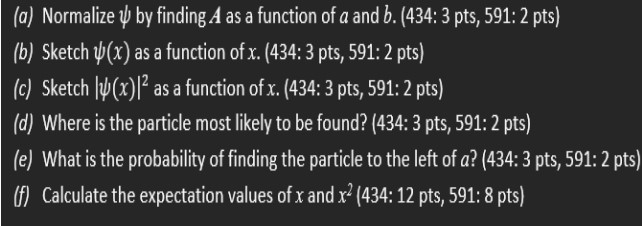

A. Normalize $\psi$ by finding A as a function of $a$ and $b$. (434: 3 pts, 591: 2 pts)


In [26]:
from sympy import symbols, integrate, solve

A, a, b, x = symbols('A a b x', real = True,  conds = 'none')
#a = symbols('a', real = True, nonzero = True)

psi1 = A*x/a
psi2 = A*(b-x)/(b-a)

temp = integrate(psi1**2, (x, 0, a)) + integrate(psi2**2, (x, a, b))

print('A =', solve(temp - 1, A)[1] = "")

A = sqrt(3)*sqrt(1/b)


B. Sketch $\psi(x)$ as a function of $x$. (434: 3 pts, 591: 2 pts)


In [99]:
import numpy as np
import plotly.express as px
from pandas import DataFrame

#choose arbitrary constant values for a and b
a = 1; b = 3

A = (3/b)**0.5

def Psi(x):
  if 0 <= x and x < a:
    return A*x/a
  elif a <= x and x <= b:
    return A*(b-x)/(b-a)
  else:
    return 0

x = np.linspace(-1, b+2, num = 10000)
psi = []
for i in x:
  psi.append(Psi(i))

psi_df = DataFrame({'x': x, 'psi': psi})

px.line(psi_df, x = 'x', y = 'psi')


C. Sketch $\left|\psi(x)\right|^2$ as a function of x. (434: 3 pts, 591: 2 pts)


In [100]:
psi_squared_df = psi_df.copy().rename(columns = {'psi':'psi^2'})
psi_squared_df['psi^2'] *= psi_squared_df['psi^2']

px.line(psi_squared_df, x = 'x', y = 'psi^2')

In [79]:
#double check that integral of PDF is 1
round(np.trapz(psi_squared_df['psi^2'], psi_squared_df['x']), 4)

1.0

D. Where is the particle most likely to be found? (434: 3 pts, 591: 2 pts)

As can be seen from the plots from parts B and C, the peak of both $\psi$ and $\psi^2$ is at $x = a$.